<a href="https://colab.research.google.com/github/HwangSiyeon/ESAA_homework/blob/main/ESAA_HW_0405_TopicModeling%2CSimilarity%2CKoNLPy_MachineLearningGuide_512_516%2C_529_543.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6. 토픽 모델링  - 뉴스그룹
- 토픽 모델링 : 문서집합에 숨어있는 주제를 찾아내는 것
- 사람이 하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심단어를 함축적으로 추출한다.
- 머신러닝 기반의 토픽 모델링에 자주 사용되는 기법
- LSA : Latent Semantic Analysis.
- LDA : Latent Dirichlet Allocation => 이 절에서는 이것만 이용해 토픽 모델링 수행. 차원축소의 LDA(Linear Discrimination Analysis)와는 다른 알고리즘
---
- 앞의 텍스트 분류에서 소개한 20뉴스그룹 데이터 세트를 이용해 적용해보자. 이 중 8개 주제를 추출하고 이들 텍스트에 LDA기반 토픽 모델링을 적용해보자



In [2]:
# 토픽모델링을 위해 fetch_20newsgroups() API로 categories 파라미터르르 통해 필요한 주제만 필터링해 추출
# 추출된 텍스트를 Count기반 벡터화 변환한다. LDA는 Count기반 벡터화만 사용한다.
# max_features =1000으로 피처 개수 재한. ngram_range는 (1,2)로 설정하고 피처 벡터화 변환

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클,야구,그래픽스,윈도우즈,중동,기독교,전자공학,의학 8개 주제 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats입력
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers','quotes'),
                             categories=cats, random_state=0)

# LDA는 Count기반 벡터화만 적용된다.
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english',ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape :', feat_vect.shape)

CountVectorizer Shape : (7862, 1000)


- CountVectorizer 객체 변수인 feat_vect 모두 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터이다. 이렇게 피처 벡터화된 데이터셋을 기반으로 LDA 토픽 모델링을 수행한다. 토픽의 개수는 위의 뉴스그룹에서 추출한 주제와 동일한 8개로 정한다.  LatentDirichletAllocation 클래스의 n_components 파라미터를 이용해 이 토픽 개수를 조정한다.(random_state값은 예제를 수행할 때마다 결과가 똑같게 하기 위해 입력한다.)


In [5]:
lda = LatentDirichletAllocation(n_components = 8, random_state = 0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

- LatentDirichletAllocation.fit(데이터 세트) 를 수행하면 LatentDirichletAllocation 객체는 components 속성값을 가지게 된다.
- components_는 개별 토픽별로 각 word피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가지고 있다. 높은 값일수록 해당 word피처는 그 토픽의 중심 word가 된다. componets의 형태와 속성값을 확인해보자.


In [6]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

- components_는 array[8,4000]으로 구성되어 있다. 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가지고 있다. 즉, components_array의 0번째 row, 10번째 col에 잇는 값은 Topic #0에 대해서 피처 벡터화된 행렬에서10번째 칼럼에 해당하는 피처가 Topic#0에 연관되는 수치값을 가지고 있다.
- lda_model.components_ 값만으로는 각 토픽별 word 연관도를 보기가 어렵다. display_topics()함수를 만들어 각 토픽별로 연관도가 높은 순으로 Word를 나열해보자.


In [7]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    #components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
    topic_word_indexed = topic.argsort()[::-1]
    top_indexes = topic_word_indexed[:no_top_words]

    #top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ''.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

#CountVectorizer객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names_out()

#토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year10gamemedicalhealthteam1220diseasecancer1993gamesyearspatientsgood
Topic # 1
donjustlikeknowpeoplesaidthinktimevedidnrightgoingsayllway
Topic # 2
imagefilejpegprogramgifimagesoutputformatfilescolorentry00usebit03
Topic # 3
likeknowdonthinkusedoesjustgoodtimebookreadinformationpeopleusedpost
Topic # 4
armenianisraelarmeniansjewsturkishpeopleisraelijewishgovernmentwardos dosturkeyarabarmenia000
Topic # 5
educomavailablegraphicsftpdatapubmotifmailwidgetsoftwaremitinformationversionsun
Topic # 6
godpeoplejesuschurchbelievechristdoeschristiansaythinkchristiansbiblefaithsinlife
Topic # 7
usedosthankswindowsusingwindowdoesdisplayhelplikeproblemserverneedknowrun


- topic#0의 경우 명확하지 않고 일반적인 단어가 주를 이루고 있다.
- topic#1의 경우는 명확하게 컴퓨터 그래픽스 영역의 주제어가 추출됨
- Topic#1의 경우 컴퓨터 그래픽스 영역의 주제어가 추출. Topic #2의 경우 기독교에 관련된 주제어. ....  이런 식으로 추출되었다.

## 문서 유사도
### 문서 유사도 측정 방법 = 코사인 유사도
- 문서와 문서 간의 유사도 비교는 코사인 유사도를 사용한다. 코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼머나 유사한지에 기반한다.

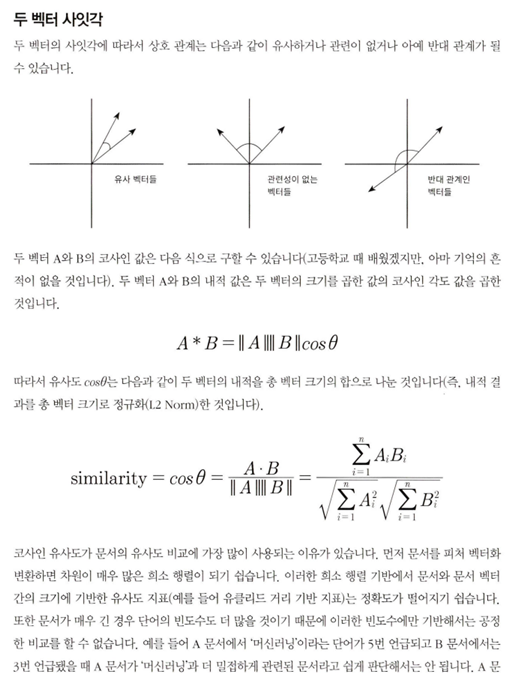

- A 문서가 B문서보다 10배이상 크다면 B문서가 오히려 '머신러닝'과 밀접하게 관련된 문서라고 판단할 수 있다.
- 코사인 유사도를 구하는 cos_similarity() 함수를 작성해보자

In [8]:
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity

# doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환한다
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = [
    'if you take the blue pill, the story ends',
    'if you take the red pill, you stay in Wonderland',
    'if you take the red pill, I show you how deep the rabbit hole goes'
]

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)


(3, 18)


- 반환된 행렬은 희소행렬이므로 앞에서 작성한 cos_simiilarity()함수의 인자인 array로 만들기 위해 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환한다.
- 이제 두개 문서의 유사도를 측정해보자

In [9]:
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, ) # feature_vect_dense[0]은 첫번째 문서의 피처벡터화
vect2 = np.array(feature_vect_dense[1]).reshape(-1, ) # feature_vect_dense[1]은 첫번째 문서의 피처벡터화

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도 : {0:3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도 : 0.402078


In [12]:
#두번째 문장과 세번째 문장의 유사도 측정
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


In [13]:
# 앞 예제의 문서 유사도f를 sklearn의 API로 측정
# cos_similarity(비교 기준이 되는 문서의 피처 행렬, 비교되는 문서의 피처 행렬)

from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


- 1은 비교기준은 문서 자신에 대한 유사도 측정, 두번째 유사도 값인 0.402는 첫번째 문서와 두번째 문서의 유사도, 세번째 유사도값인 0.404는 첫번째 문서와 세번째 문서의 유사도 값

In [14]:
# 자신과의 유사도인 1값 지우기
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


### Opinion Review 데이터셋을 이용한 문서 유사도 측정

In [17]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [21]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = '/content/drive/MyDrive/ESAA_OB_HW/DATA/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
  df = pd.read_table(file_, index_col = None, header=0, encoding='latin1')
  filename_ = file_.split('\\')[-1]
  filename = filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename': filename_list, 'opinion_text':opinion_text})

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english',
                             ngram_range = (1,2), min_df = 0.05, max_df = 0.85 )

# opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서간의 유사도를 알아보자
- 문서를 피처 벡터화해 변환하면 문서 내 단어에 출현 빈도와 같은 값을 부여해 각 문서가 단어 피처의 값으로 벡터화된다. 각 문서가 피처벡터화된 데이터를 cosine_similarity()를 이용해 상호 비교해 유사도를 확인하자
- DataFrame 객체 변수인 document_df에서 호텔로 군집화된 문서의 인덱스를 추출한다
- 이 인덱스를 TfidVectorizer객체 변수인 feature_vect에서 호텔로 군집화된 문서의 피처 벡터를 추출한다.

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

#cluster_label=1인 데이터는 호텔로 군집화된 데이터. df에서 해당 인덱스 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화 된 문서들의 DataFrame Index:', hotel_indexes)

#호텔로 군집화된 데이터 중 첫번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, '와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫번째 문서와 다른 문서 간의 코사인 유사도 측정. '''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame Index: Index([1, 5, 6, 7, 12, 13, 15, 19, 20, 21, 33, 44, 45, 46, 47, 49], dtype='int64')
##### 비교 기준 문서명 /content/drive/MyDrive/ESAA_OB_HW/DATA/topics/room_holiday_inn_london 와 타 문서 유사도######
[[1.         0.31124876 0.81484367 0.77312013 0.10831277 0.19917258
  0.16717527 0.15836737 0.11154184 0.15026112 0.51442299 0.40020673
  0.37631406 0.19544761 0.26026786 0.22235374]]


- 첫 번째 문서와 다른 문서 간에 유사도가 높은 순으로 이를 정렬하고 시각화해보자
- cosine_similarity()는 쌍 형태의 ndarray를 반환하므로 판다스 인덱스로 이용하기 위해 reshape(-1)을 한다

<ipython-input-24-d46653218cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='similarity', y='filename', data = hotel_1_sim_df, palette = 'muted')


Text(0.5, 1.0, '/content/drive/MyDrive/ESAA_OB_HW/DATA/topics/room_holiday_inn_london')

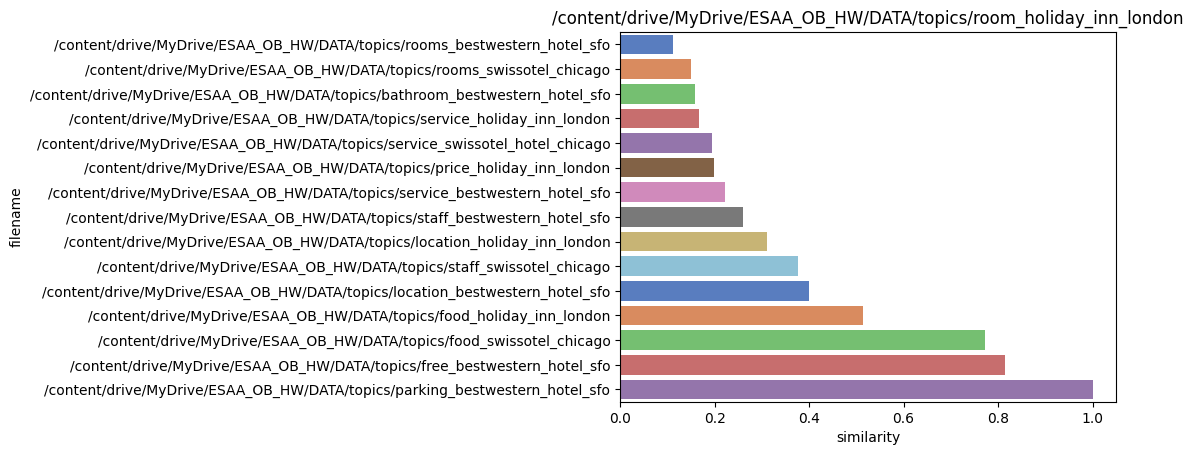

In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기자신은 제외
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexed를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data = hotel_1_sim_df, palette = 'muted')
plt.title(comparison_docname)

## 09. 한글 텍스트 처리
- 이번에는 네이버 영화 평점 데이터를 기반으로 감성 분석을 적용해본다.  또, KoNLPt를 소개하겠다

### 한글  NLP처리의 어려움
- 일반적으로 한글 언어 처리는 영어나 라틴어보다 어렵다. 띄어쓰기와 다양헌 조사를 전처리 시 제거하기 어렵기 때문이다.
- 띄어쓰기를 잘못하면 의미왜곡
- 조사의 경우의 수가 많아 Stemming과 Lemmatization이 전처리 시 제거가 어렵.

### KoNLPy
- KoNLPy : 파이썬의 한글 형태소 패키지.
- 형태소 : 단어로서 의미를 가지는 최소 단위
- 형태소 분석 : 말뭉치를 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅(POS tagging)을 부착하는 작업
- KoNLPy는 기존의 C/C++,Java로 만들어진 한글 형태소 엔진을 파이썬 래퍼 기반으로 재작성한 패키지이다. 기존의 엔진은 그대로 유지한 채 파이썬 기반에서 인터페이스를 제공하므로 검증된 패키지의 안정성을 유지할 수 있다.

In [25]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 39.3 MB/s eta 0:00:00


In [27]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/ESAA_OB_HW/DATA/ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [29]:
# 0과 1의 Label값 비율 비교. 1이 긍정감성, 0이 부정감성
train_df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

- 0과 1이 치우지지 않고 균등한 분포이다
- train_df의 경우 리뷰 텍스트를 가지는 document칼럼에 Null이 일부 존재하므로 이 값은 공백으로 변환한다. 문자가 아닌 숫자의 경우 단어적 의미가 부족하므로 re(정규표현식모듈)를 이용해 공백으로 변환

In [31]:
import re

train_df = train_df.fillna('')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미)
train_df['document'] = train_df['document'].apply(lambda x: re.sub(r'\d+', ' ', x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/ESAA_OB_HW/DATA/ratings_test.txt', sep='\t')
test_df = test_df.fillna('')
test_df['document'] = test_df['document'].apply(lambda x: re.sub(r'\d+', ' ', x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

- TF-IDF 방식으로 단어 벡터화. 각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화.
- 한글 형태소 엔진은 SNS분석에 적합한 Twitter클래스 이용.

In [32]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


- TfidfVectorizer를 이용해 TF-IDF피처 모델을 생성. tokenizer는 위에서 만든 tw_tokenizer()함수를 이용. ngram은 (1,2), min_df = 3 , max_df는 상위 90%로 제한


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# twitter 객체의 morphs() 객체를 이용한 tokenizer 사용. ngram_range=(1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [36]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행.
lg_clf = LogisticRegression(random_state = 0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {"C": [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid = params, cv = 3, scoring = "accuracy", verbose = 1)
grid_cv.fit(tfidf_matrix_train, train_df["label"])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 3.5} 0.8593


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- C가 3.5일 때 최고 0.8593의 정확도
- 테스트 데이터셋을 이용한 최종 감성분석 예측 수행.
- 테스트 데이터셋을 이용해 예측할 때는 적용한 TfidVectorizer를 그대로 사용해야 한다. 그래야 학습 시 설정된 TfidVectorizer 객체 변수인 tfid_vect를 이용해 transform()을 테스트 데이터의 document칼럼에 수행한다.

In [37]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 gridsearchcv에서 최적 파라미터로 학습된 calssifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86186
